# Importing Essential Librairies 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPool2D
from keras.layers import Dropout
from tensorflow.python.keras import regularizers
from keras.layers import Dense, Activation, Flatten
from keras.utils import load_img
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

# Defining Directories for the Train and Validation 

In [3]:
train_dir = "C:/Users/stash/Special Topics Project/images/train"
test_dir = "C:/Users/stash/Special Topics Project/images/validation"

img_size=48

# Inducting Data and Pre-processing 


In [152]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 23060 images belonging to 7 classes.
Found 1411 images belonging to 7 classes.


# Defining Labels 

In [154]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}
confusion_predict=['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', 'Surprise']

# Applying EDA(Exploratory Data Analysis) to test and training data


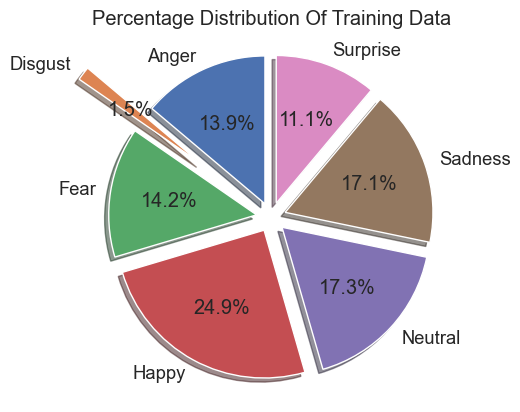

In [156]:
count=[list(train_generator.classes).count(i) for i in np.unique(train_generator.classes)]
count1=[list(validation_generator.classes).count(i) for i in np.unique(validation_generator.classes)]

explode=(0.1,0.6,0.1,0.1,0.1,0.1,0.1)

fig1=plt.pie(count,labels=confusion_predict,explode=explode,shadow=True,startangle=90,autopct='%1.1f%%')


plt.title('Percentage Distribution Of Training Data')

plt.show()


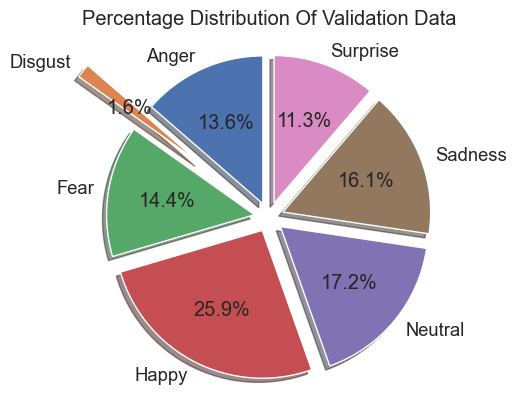

In [149]:
fig2=plt.pie(count1,labels=confusion_predict,explode=explode,shadow=True,startangle=90,autopct='%1.1f%%')

plt.title('Percentage Distribution Of Validation Data')

plt.show()


In [160]:
fig = px.bar(x = label_dict,
             y = [list(train_generator.classes).count(i) for i in np.unique(train_generator.classes)], color = np.unique(train_generator.classes) )

fig.update_xaxes(title="Different Emotions")
fig.update_yaxes(title = "Count of Images being Trained")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Distribution Data for Train Data',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()


# Building a CNN Model

In [6]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [162]:
epochs = 60
batch_size = 64
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [16]:
history = model.fit(x================] - 302s 837ms/step - loss: 1.3615 - accuracy: 0.6382 - val_loss: 1.4292 - val_accuracy: 0.6187
Epoch 40/60
361/361 [==============================] - 289s 799ms/step - loss: 1.3578 - accuracy: 0.6382 - val_loss: 1.4121 - val_accuracy: 0.6230
Epoch 41/60
361/361 [==============================] - 303s 840ms/step - loss: 1.3582 - accuracy: 0.6407 - val_loss: 1.3994 - val_accuracy: 0.6350
Epoch 42/60
361/361 [==============================] - 306s 849ms/step - loss: 1.3468 - accuracy: 0.6469 - val_loss: 1.3930 - val_accuracy: 0.6357
Epoch 43/60
361/361 [==============================] - 287s 795ms/step - loss: 1.3531 - accuracy: 0.6421 - val_loss: 1.3974 - val_accuracy: 0.6357
Epoch 44/60
361/361 [==============================] - 292s 809ms/step - loss: 1.3535 - accuracy: 0.6438 - val_loss: 1.4266 - val_accuracy: 0.6230 = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
361/361 [==============================] - 379s 1s/step - loss: 9.3013 - accuracy: 0.1901 - val_loss: 8.7120 - val_accuracy: 0.1637
Epoch 2/60
361/361 [==============================] - 328s 909ms/step - loss: 8.2374 - accuracy: 0.2276 - val_loss: 7.6144 - val_accuracy: 0.2757
Epoch 3/60
361/361 [==============================] - 310s 857ms/step - loss: 7.2309 - accuracy: 0.2494 - val_loss: 6.5397 - val_accuracy: 0.3069
Epoch 4/60
361/361 [==============================] - 302s 836ms/step - loss: 6.2440 - accuracy: 0.2785 - val_loss: 5.6775 - val_accuracy: 0.3274
Epoch 5/60
361/361 [==============================] - 298s 825ms/step - loss: 5.3323 - accuracy: 0.3124 - val_loss: 4.8958 - val_accuracy: 0.3607
Epoch 6/60
361/361 [==============================] - 321s 887ms/step - loss: 4.5694 - accuracy: 0.3452 - val_loss: 4.2641 - val_accuracy: 0.3813
Epoch 7/60
361/361 [==============================] - 376s 1s/step - loss: 3.9561 - accuracy: 0.3704 - val_loss: 3.5918 - val_a

Epoch 57/60
361/361 [==============================] - 299s 828ms/step - loss: 1.3219 - accuracy: 0.6670 - val_loss: 1.4066 - val_accuracy: 0.6456
Epoch 58/60
361/361 [==============================] - 305s 843ms/step - loss: 1.3254 - accuracy: 0.6670 - val_loss: 1.3992 - val_accuracy: 0.6336
Epoch 59/60
361/361 [==============================] - 296s 820ms/step - loss: 1.3151 - accuracy: 0.6687 - val_loss: 1.4360 - val_accuracy: 0.6435
Epoch 60/60
361/361 [==============================] - 312s 863ms/step - loss: 1.3157 - accuracy: 0.6688 - val_loss: 1.4135 - val_accuracy: 0.6343


In [17]:
model.save('model_optimal01.h5')

# Training Plots  for Accuracy and Losss


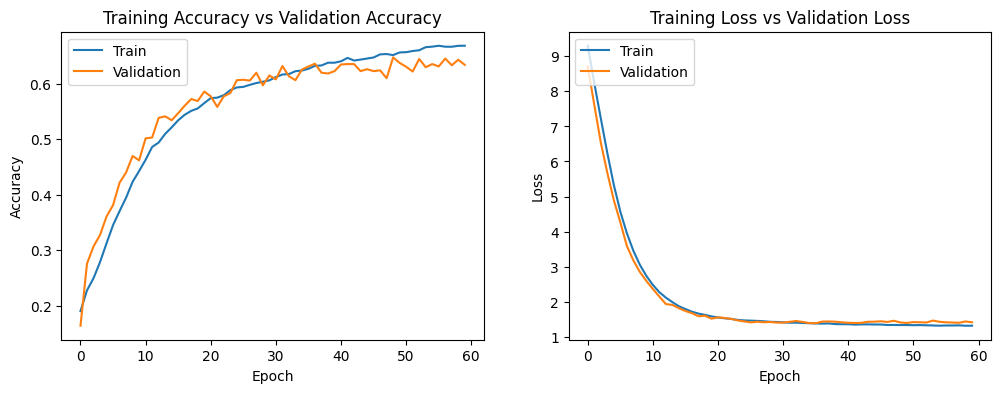

In [18]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Verifying Results by Uploading Image

(48, 48)


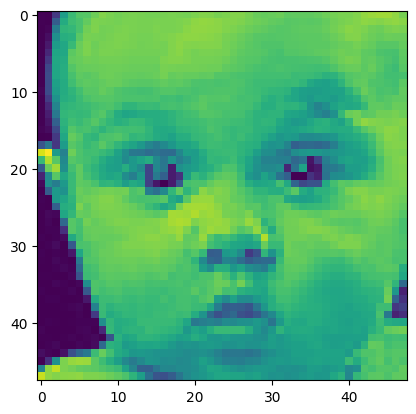

In [19]:
import tensorflow as tf

img = tf.keras.utils.load_img("C:/Users/stash/Special Topics Project/images/validation/surprise/3445.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [21]:
img1 = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img1 = img.reshape(1,48,48,1)
result = model.predict(img1)
result = list(result[0])
print(result)

1/1 [==============================] - 0s 21ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


In [22]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Surprise


# Generating Confusion Matrix for the Model

In [23]:
model.evaluate(validation_generator)
preds=model.predict(validation_generator)
y_preds=np.argmax(preds , axis= 1)
y_test=np.array(validation_generator.labels)

23/23 [==============================] - 3s 128ms/step


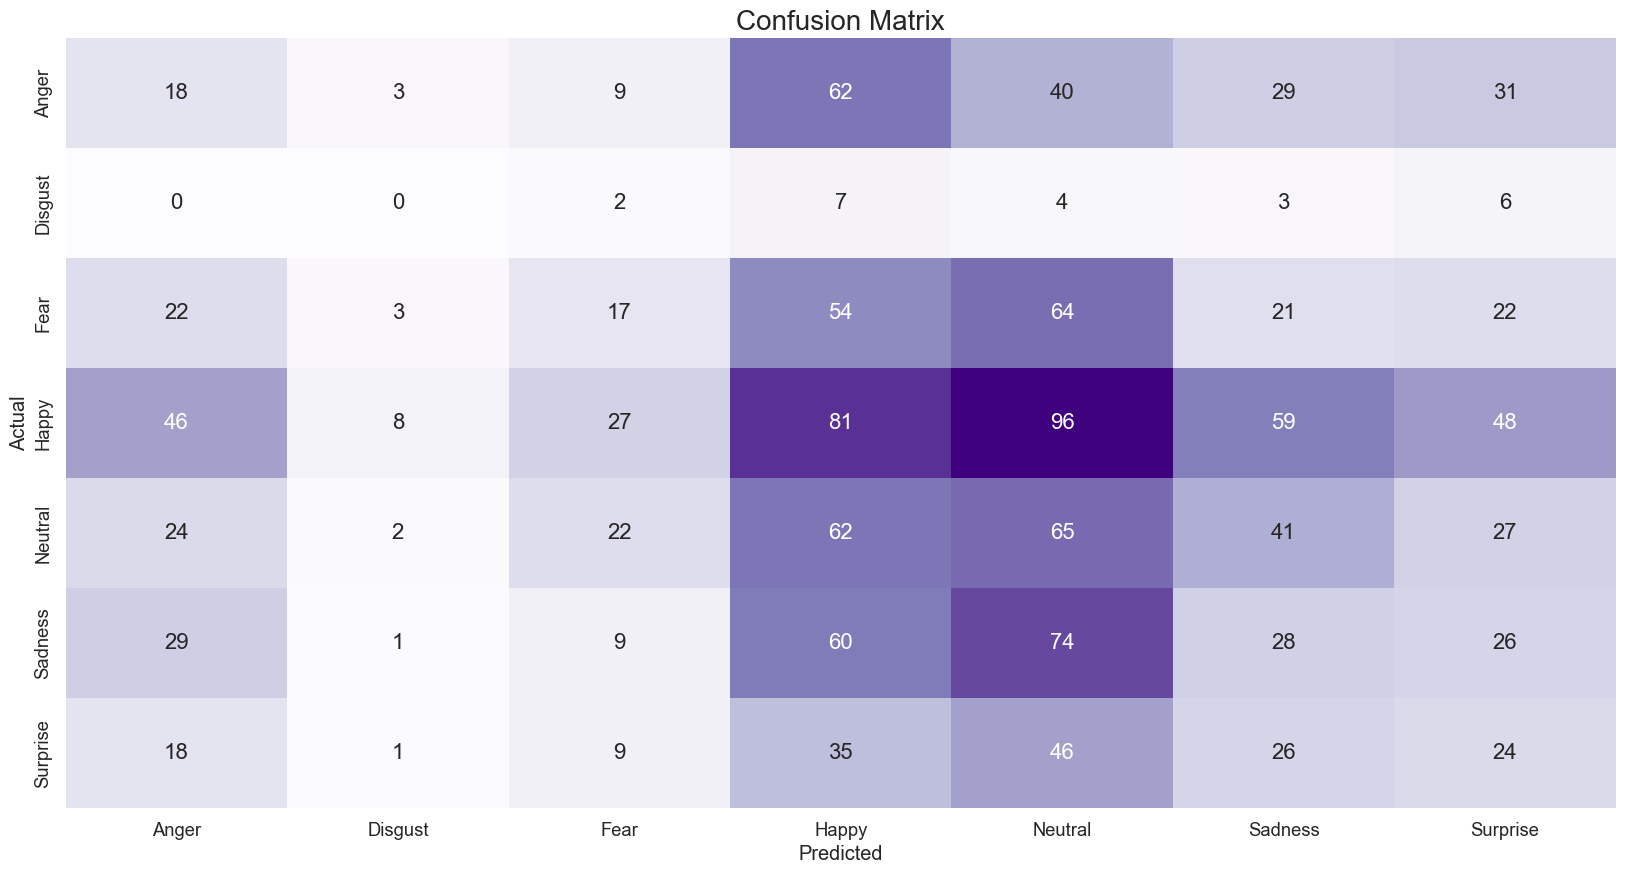

In [39]:
cm_data = confusion_matrix(y_test , y_preds)
cm = pd.DataFrame(cm_data, columns=confusion_predict, index = confusion_predict)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Purples", annot=True, annot_kws={"size": 16}, fmt='g')